In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
F = np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/F.npy', allow_pickle=True)
Fneu = np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/Fneu.npy', allow_pickle=True)
spks = np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/spks.npy', allow_pickle=True)
stat = np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/stat.npy', allow_pickle=True)
ops =  np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load('D:/Dropbox/Slice Video Processing/2022_03_02/new_videos_suite2p/suite2p/plane0/iscell.npy', allow_pickle=True)

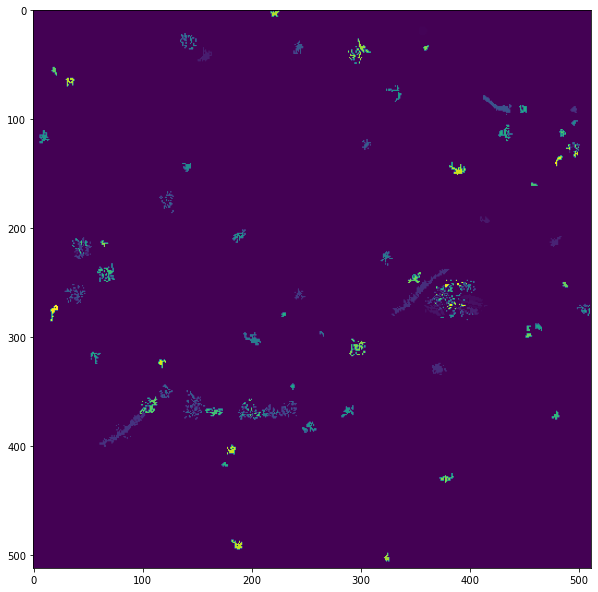

In [30]:
ncells = stat.shape[0] # Total number of cells

im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,ncells):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.figure(figsize=(10,102))
plt.imshow(im)
plt.show()